<a href="https://colab.research.google.com/github/sbborusu/530pm_Agentic_Ai_Batch_7thApril/blob/main/EDA_5Hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r'/content/Churn_Modelling.csv')

In [ ]:
df.info()
#print(type(df))
#print(type(df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9963 non-null   object 
 6   Age              9969 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
#print(df.isnull())
#print(type(df.isnull()))
print(df.isnull().sum())
#print(type(df.isnull().sum()))

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender             37
Age                31
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64


# Handling missing values

1. Delete the columns with missing values

In [ ]:
updated_df = df.dropna(axis=1)
print(updated_df.info())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ---

2. Delete the rows with missing values

In [ ]:
updated_df = df.dropna(axis=0)
print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9936 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9936 non-null   int64  
 1   CustomerId       9936 non-null   int64  
 2   Surname          9936 non-null   object 
 3   CreditScore      9936 non-null   int64  
 4   Geography        9936 non-null   object 
 5   Gender           9936 non-null   object 
 6   Age              9936 non-null   float64
 7   Tenure           9936 non-null   int64  
 8   Balance          9936 non-null   float64
 9   NumOfProducts    9936 non-null   int64  
 10  HasCrCard        9936 non-null   int64  
 11  IsActiveMember   9936 non-null   int64  
 12  EstimatedSalary  9936 non-null   float64
 13  Exited           9936 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


3. Filling the missing values - Imputation

In [ ]:
df['Age'].mean()

np.float64(38.93239041027184)

In [ ]:
df['Age'].median()

37.0

In [ ]:
# updated_df = df.fillna(df['Age'].mean()) #This will replace all columns in df with mean value of 'Age' column and will impact all columns where data is null
updated_df = df.copy()
updated_df['Age'] = df['Age'].fillna(df['Age'].mean()) # This will replace only 'Age' column with mean of Age and other columns will be intact
print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9963 non-null   object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


4. Forward and Backward Filling - Imputation

In [ ]:
df = pd.read_csv(r'/content/Churn_Modelling.csv')
df1 = df.copy()

In [ ]:
df1['Age'] = df['Age'].bfill() # backward fill that fills null values from its next record value
df1['Gender'] = df['Gender'].ffill() # forward fill that fills null values from its previous record value
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


In [ ]:
df_notnull = df.isnull()
print(df_notnull.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   RowNumber        10000 non-null  bool 
 1   CustomerId       10000 non-null  bool 
 2   Surname          10000 non-null  bool 
 3   CreditScore      10000 non-null  bool 
 4   Geography        10000 non-null  bool 
 5   Gender           10000 non-null  bool 
 6   Age              10000 non-null  bool 
 7   Tenure           10000 non-null  bool 
 8   Balance          10000 non-null  bool 
 9   NumOfProducts    10000 non-null  bool 
 10  HasCrCard        10000 non-null  bool 
 11  IsActiveMember   10000 non-null  bool 
 12  EstimatedSalary  10000 non-null  bool 
 13  Exited           10000 non-null  bool 
dtypes: bool(14)
memory usage: 136.8 KB
None


# Feature Scaling

In [ ]:
pip install -U scikit-learn

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9963 non-null   object 
 6   Age              9969 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
from sklearn.preprocessing import StandardScaler #To use standardization technique for feature scaling
from sklearn.preprocessing import MinMaxScaler #To use normalization technique for feature scaling

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,9969.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.932390,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.483804,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
new_df = pd.DataFrame(df, columns=['Age', 'Tenure'])
new_df.head(5)

,Age,Tenure
0,42.0,2
1,41.0,1
2,42.0,8
3,39.0,1
4,43.0,2


In [ ]:
new_df['Age'] = new_df['Age'].fillna(new_df['Age'].mean())
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     10000 non-null  float64
 1   Tenure  10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [ ]:
scaler = MinMaxScaler() # Instantiating the MinMaxScaler class
normalized_df_2D = scaler.fit_transform(new_df) # Does the feature scaling using normalization technique that converts to a 2D matrix
normalized_df = pd.DataFrame(normalized_df_2D, columns= ['Age', 'Tenure']) #Convert 2d array to data frame

In [ ]:
#Simple example that uses Normalization technique for feature scaling
x_array = np.array([[2], [3], [4], [5], [6]])
scaler = MinMaxScaler()
normalized_array = scaler.fit_transform(x_array)
print(normalized_array)

[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


In [ ]:
scaler = StandardScaler()
standardized_df_2D = scaler.fit_transform(new_df)
print(standardized_df_2D)
standardized_df = pd.DataFrame(standardized_df_2D, columns= ['Age', 'Tenure'])

[[ 0.29307391 -1.04175968]
 [ 0.19753571 -1.38753759]
 [ 0.29307391  1.03290776]
 ...
 [-0.28015531  0.68712986]
 [ 0.29307391 -0.69598177]
 [-1.04446095 -0.35020386]]


In [ ]:
#Simple example that uses Standardization technique for feature scaling
x_array = np.array([[2], [3], [5], [6], [6]])
scaler = StandardScaler()
normalized_array = scaler.fit_transform(x_array)
print(normalized_array)

[[-1.47709789]
 [-0.86164044]
 [ 0.36927447]
 [ 0.98473193]
 [ 0.98473193]]


# Outlier Treatment

In [1]:
# 3-Sigma Treatment (Standard Deviation)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

In [3]:
# This will do an authentication of google drive with google colab so that files in
# google drive can be directly accessed from google colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/raw_sales.csv')
#This is the file location in google drive.
# /content/drive is the mounted path in google colab where the file from drive is mounted,
# /MyDrive is google drive's directory
# /raw_sales.csv is the file that we want to read.

In [5]:
data.head(5)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
#Basic standard deviation and mean
import math
arr = [1,2,3,10]
print(np.mean(arr))
print(math.sqrt(12.5))
print(np.std(arr))

4.0
3.5355339059327378
3.5355339059327378


In [10]:
def anomolies(data):
  outliers = []

  mean = statistics.mean(data)
  std = statistics.stdev(data)

  # Any data that is + or - 3 times standard deviation is an outlier. So, cutoff is identified by multiplying standarddeviation by 3
  anomaly_cut_off = std * 3

  lower_bound = mean - anomaly_cut_off
  upper_bound = mean + anomaly_cut_off


  print(mean)
  print(std)

  for outlier in data:
    if(outlier < lower_bound or outlier > upper_bound):
      outliers.append(outlier)

  return outliers

In [11]:
data.price

,price
0,525000
1,290000
2,328000
3,380000
4,310000
...,...
29575,500000
29576,560000
29577,464950
29578,589000


In [13]:
list_1 = anomolies(data['price'])
print(list_1)

609736.262204192
281707.905374164
[1530000, 1780000, 1460000, 3500000, 2100000, 1580000, 2600000, 1875000, 2200000, 1620000, 1562500, 2350000, 1580000, 7300000, 1670000, 1780000, 2400000, 1530000, 1567140, 1700000, 1675000, 2060000, 1750000, 1500000, 1725000, 1455000, 2000000, 1475000, 4150000, 1780000, 1650000, 2500000, 5425000, 2200000, 2375000, 2100000, 1950000, 1980000, 1525000, 1900000, 1460000, 1500000, 1500000, 2760000, 1550000, 1605000, 1730000, 1650000, 1575000, 1530000, 1510000, 1501000, 1880000, 1620000, 1650000, 1470000, 1495000, 1600000, 1910000, 1485000, 1965000, 1640000, 1777500, 1500000, 1480000, 1650000, 1625000, 1540000, 2600000, 1900000, 3160000, 1975000, 1555000, 1900000, 1785000, 1701000, 1510000, 2080000, 3400000, 2050000, 1510000, 2550000, 1900000, 1801000, 1950000, 3400000, 1650000, 1915000, 1870000, 1560000, 2400000, 2090000, 1490000, 1670000, 1550000, 1560000, 1700000, 1800000, 1900000, 1710000, 1475000, 2125000, 1600000, 1675000, 1952500, 1670000, 1665000, 21

In [14]:
len(list_1)

461

In [15]:
Percentage_of_outliers = (len(list_1)/len(data))*100
print(Percentage_of_outliers) # 1.55% is beyond the range of the accepted range 0.3% outlier data as per normal distribution curve, so outliers should be treated.


1.5584854631507776


In [17]:
#data['price'].skew()
data.price.skew()

np.float64(4.312009366902366)

<Axes: xlabel='price', ylabel='Density'>

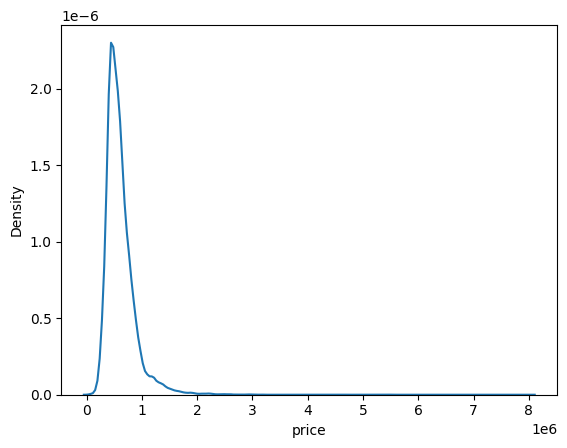

In [19]:
import seaborn as sns
sns.kdeplot(data['price'])

(array([2.5955e+04, 3.3500e+03, 2.2300e+02, 3.5000e+01, 7.0000e+00,
        5.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  56500.,  850850., 1645200., 2439550., 3233900., 4028250.,
        4822600., 5616950., 6411300., 7205650., 8000000.]),
 <BarContainer object of 10 artists>)

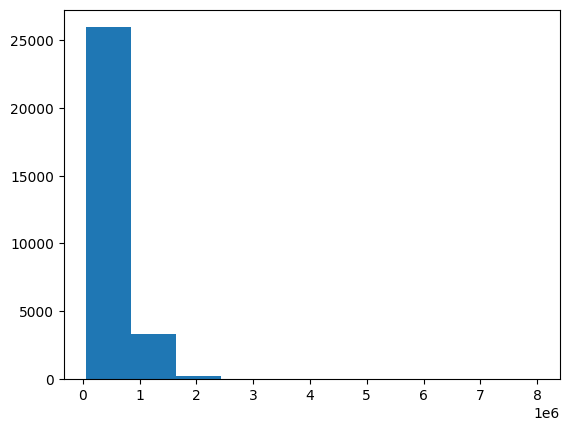

In [30]:
plt.hist(data['price'])

In [31]:
data['transformed_data'] = np.log(data.price)

In [32]:
data['transformed_data']

,transformed_data
0,13.171154
1,12.577636
2,12.700769
3,12.847927
4,12.644328
...,...
29575,13.122363
29576,13.235692
29577,13.049685
29578,13.286181


In [34]:
data.transformed_data.skew() # reduced skewness after log transformation

np.float64(0.4731646269984763)

In [36]:
list_2 = anomolies(data['transformed_data'])
print(len(list_2))

13.244695494326452
0.3752141124362711
266


In [37]:
Percentage_of_outliers = (len(list_2)/len(data))*100
print(Percentage_of_outliers) # From 1.55, the outlier percentage has been brought down to 0.89 after reducing the skewness using log transformation
# But this is still not close to accepted 0.3% of outliers in normal distribution curve

0.8992562542258282
